# Problem 2

https://s3.amazonaws.com/dd-interview-data/data_scientist/baseball/appearances/YYYY/YYYY-0,000


### Download all files

Stream for one year of records

So I'm basically creating code to do what a relational database does!  :-D

In [1]:
%load_ext snakeviz
# from itertools import combinations
from utils import run
    
%snakeviz run()

Filename: /Users/ryan/datadog/for_candidate/utils.py

Line #    Mem usage    Increment   Line Contents
    84     63.3 MiB      0.0 MiB   @profile
    85                             def get_player_team_maps(verbose=True):
    86     63.3 MiB      0.0 MiB       team_to_player_id = defaultdict(set)
    87     63.3 MiB      0.0 MiB       bball_records = BaseBallRecords(verbose=verbose)
    88     68.4 MiB      5.1 MiB       for idx, record in enumerate(bball_records):
    89     68.4 MiB      0.0 MiB           player_id = record['player_id_code']
    90     68.4 MiB      0.0 MiB           team = record['team']
    91     68.4 MiB      0.0 MiB           team_to_player_id[team].add(player_id)
    92     68.4 MiB      0.0 MiB       return team_to_player_id


Filename: /Users/ryan/datadog/for_candidate/utils.py

Line #    Mem usage    Increment   Line Contents
   102     68.4 MiB      0.0 MiB   @profile
   103                             def get_shared_player_teams(team_to_player_id, min_play

FileNotFoundError: [Errno 2] No such file or directory: 'snakeviz': 'snakeviz'

### Brief Analysis of run-time and space complexity.


There are two major functions of interest from a Time Space Complexity perspective: 

1. Creating a hash table mapping players to teams
1. Aggregating team triples for which 50 players played on all three teams at some point

The first step is essentially linear in space, and linear/log in time. 

The second step is exponential. Justification is given below.

## Detailed Analysis of run-time and space complexity

### 1. `get_player_team_maps(verbose=False)`

##### Space Complexity
     O(N*M) --> O(Log(M*N)) 
     
     N = Teams, M = Player-Team Edges 
     (linear but approaching log)
     
     since we're storing the occurence of a player's id once 
     no matter how many times it comes up

     There is also some oscillation in space needed due to
     paginating the results from each request as can be 
     seen inside of the BaseBallRecords class

##### Time Complexity
     O(N*M)
     
     N = Teams, M = Player-Team Edges

##### Details:
  Append to a hashtable of sets gradually one row at a time (consumed as bytes)
 {key: set([player_id_1, player_id_2, ..., player_id_n])}



### 2. `get_shared_player_teams(team_to_player_id)`
##### Space Complexity
     O(1)
     
     From step 1, there is no increase in the amount of space used
     the generation of combinations is done with a `generator`.

#####  Time Complexity
     O(N^3) + O(M)
     
     N = Teams, M = Player-Team Edges
     
     the exponential is because we're going through all combinations of triples
     the constant [O(M)] is because checking the intersection between sets is O(1) for each entry, and therefore O(M) for however many players are in the set. Really though, this will be faster than linear because the intersection will be as fast as what the smallest set would allow.  

     Justification:
     query took about 30 seconds and most of that is waiting
     for http requests. 

##### Pseudo Code
     For all combinations of length 3 of all teams
     Get the intersection between the sets of 
         all players that were on each of those teams
     If this length is greater than or equal to 50, 
         then that is a triple of teams that shared 50 players


# Snake Viz profile for making hash table

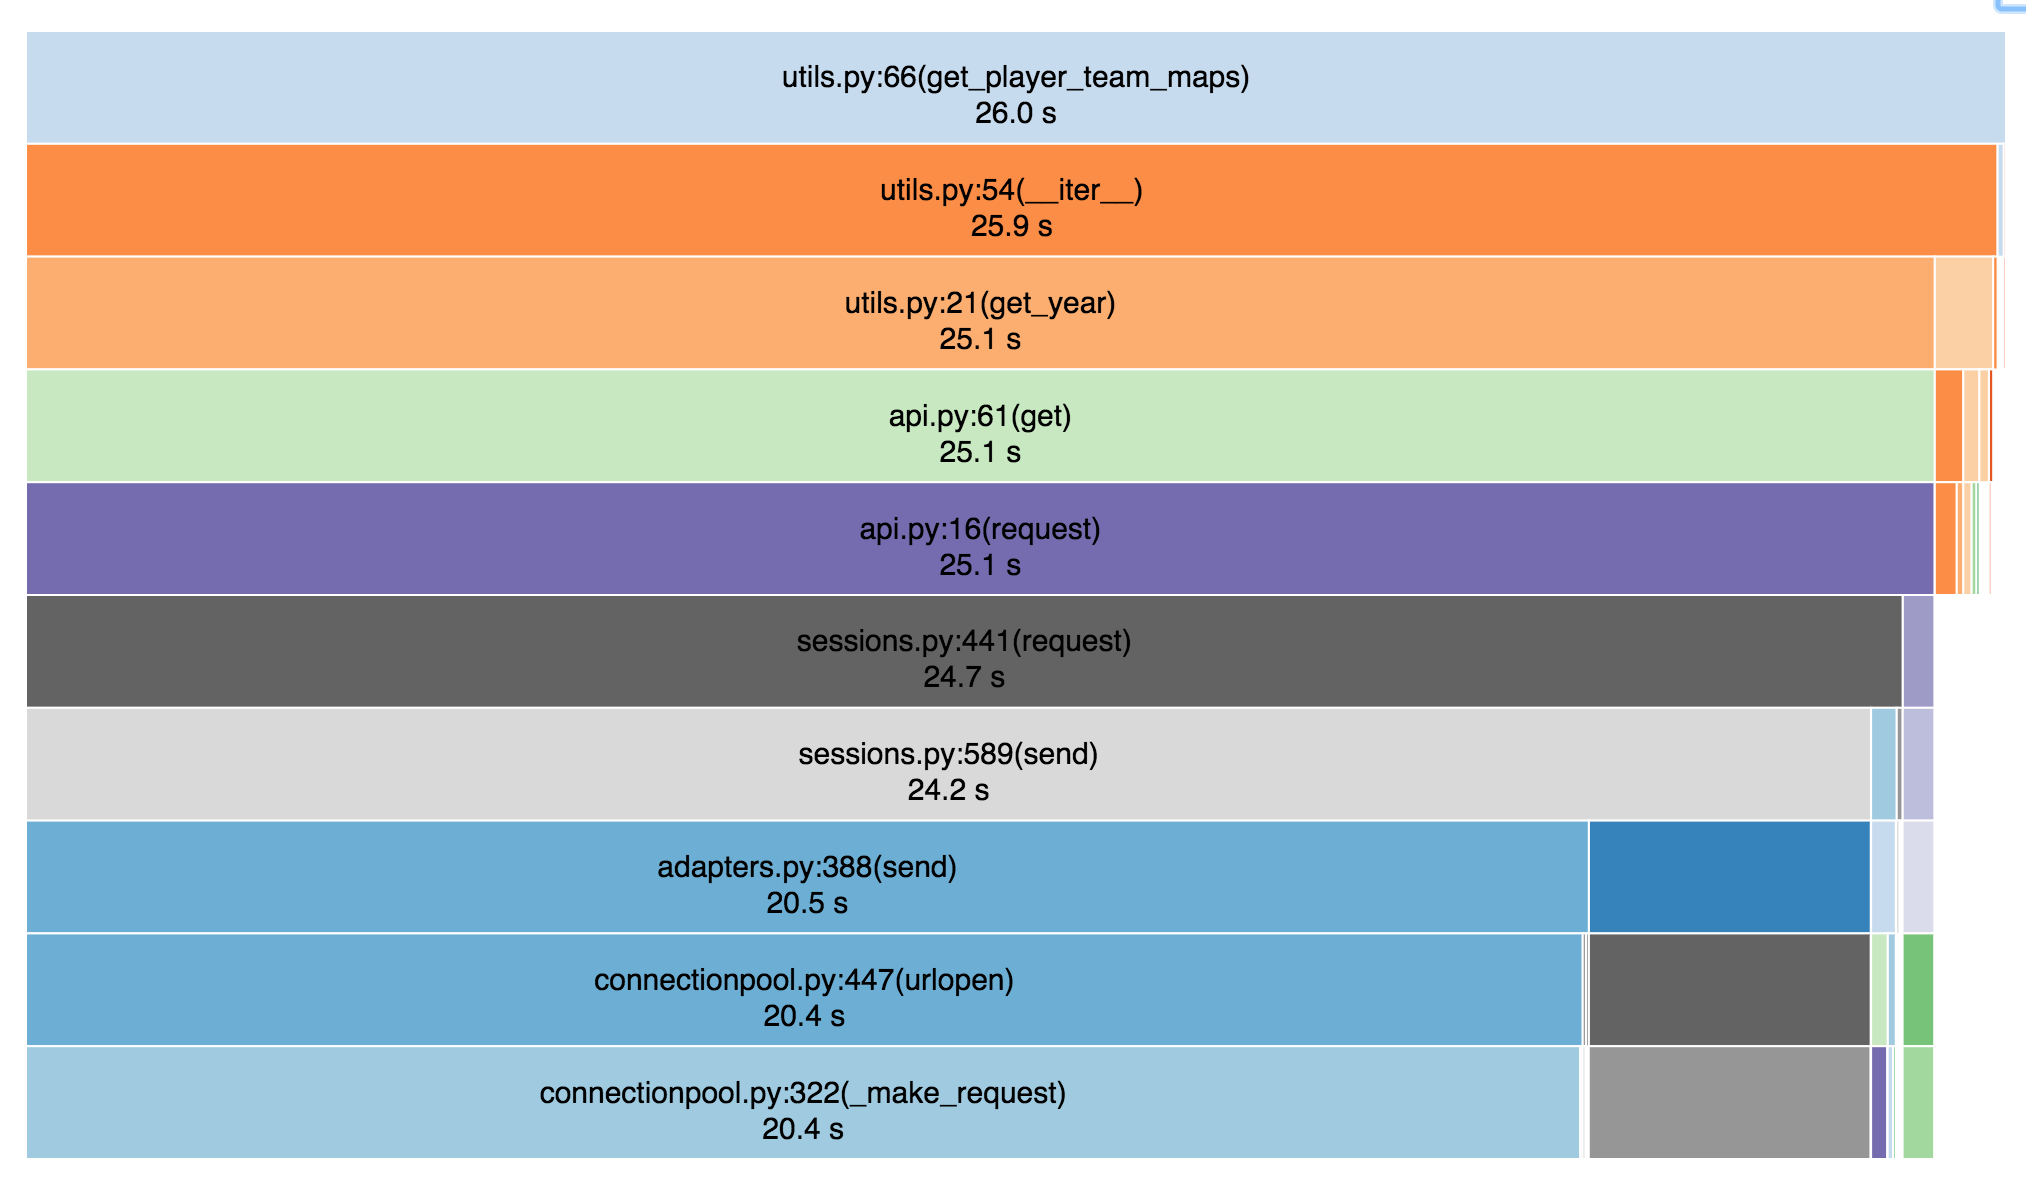

##### most of the time is spent waiting on requests

# Snakeviz profile for Aggregating the triples
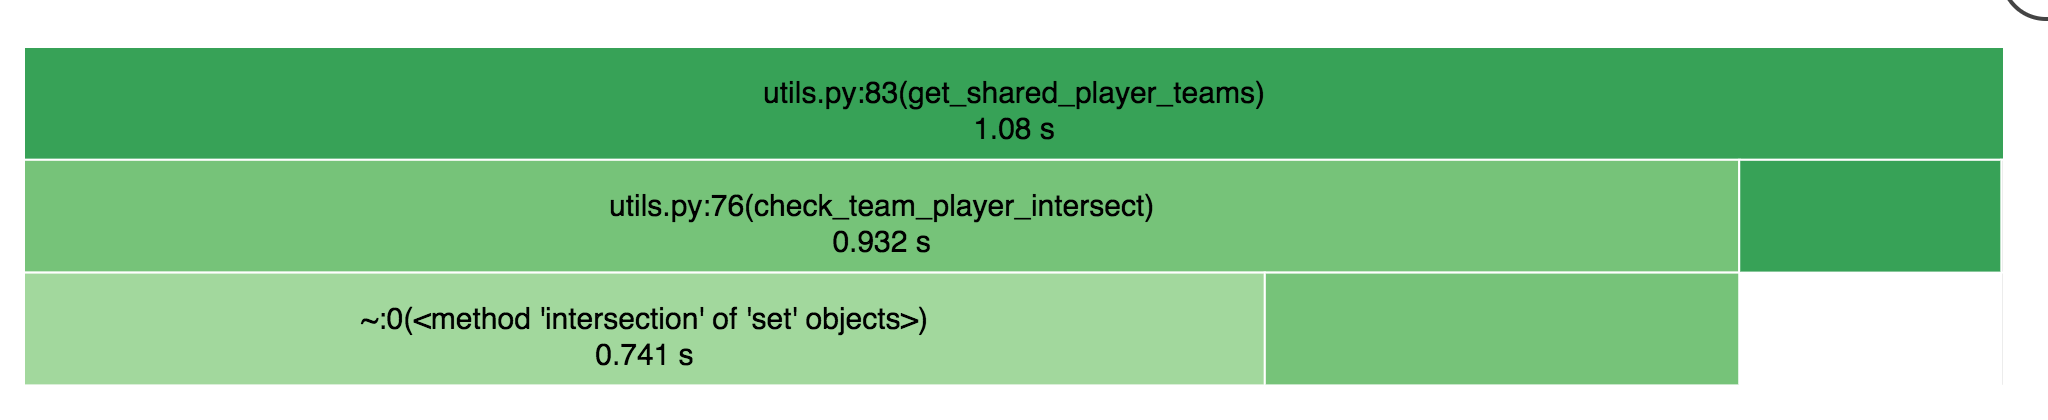



# Memory Profile

##### run it yourself

In [3]:
# !mprof run --include-children utils.py

mprof: Sampling memory every 0.1s
running as a Python program...
total possible team triples: 562475
triples that shared 50 players: 11
[('CHN', 'PHI', 'PIT'), ('CHN', 'PHI', 'CIN'), ('CHN', 'PHI', 'SLN'), ('CHN', 'PIT', 'CIN'), ('CHN', 'CIN', 'SLN'), ('PHI', 'PIT', 'CIN'), ('PHI', 'PIT', 'SLN'), ('PHI', 'CIN', 'SLN'), ('PIT', 'CIN', 'SLN'), ('CHA', 'CLE', 'BOS'), ('CHA', 'CLE', 'NYA')]


In [2]:
!python -m memory_profiler utils.py

Filename: utils.py

Line #    Mem usage    Increment   Line Contents
    67     43.6 MiB     43.6 MiB   @profile
    68                             def get_player_team_maps(verbose=True):
    69     43.6 MiB      0.0 MiB       team_to_player_id = defaultdict(set)
    70     43.6 MiB      0.0 MiB       bball_records = BaseBallRecords(verbose=verbose)
    71     55.1 MiB      7.1 MiB       for idx, record in enumerate(bball_records):
    72     55.1 MiB     -3.2 MiB           player_id = record['player_id_code']
    73     55.1 MiB     -3.2 MiB           team = record['team']
    74     55.1 MiB     -2.1 MiB           team_to_player_id[team].add(player_id)
    75     55.1 MiB      0.0 MiB       return team_to_player_id


Filename: utils.py

Line #    Mem usage    Increment   Line Contents
    85     55.1 MiB     55.1 MiB   @profile
    86                             def get_shared_player_teams(team_to_player_id, min_players_shared=50):
    87     55.1 MiB      0.0 MiB       teams_that_sh

##### compare to what's already run below:

Line #    Mem usage    Increment   Line Contents
================================================
    67     56.2 MiB      0.0 MiB   @profile
    68                             def get_player_team_maps(verbose=True):
    69     56.2 MiB      0.0 MiB       team_to_player_id = defaultdict(set)
    70     56.2 MiB      0.0 MiB       bball_records = BaseBallRecords(verbose=verbose)
    71     66.7 MiB     10.4 MiB       for idx, record in enumerate(bball_records):
    72     66.7 MiB      0.0 MiB           player_id = record['player_id_code']
    73     66.7 MiB      0.0 MiB           team = record['team']
    74     66.7 MiB      0.0 MiB           team_to_player_id[team].add(player_id)
    75     66.7 MiB      0.0 MiB       return team_to_player_id


Filename: utils.py

Line #    Mem usage    Increment   Line Contents
================================================
    85     66.7 MiB      0.0 MiB   @profile
    86                             def get_shared_player_teams(team_to_player_id, min_players_shared=50):
    87     66.7 MiB      0.0 MiB       teams_that_share = []
    88     66.7 MiB      0.0 MiB       for team_i, team_j, team_k in combinations(team_to_player_id.keys(), 3):
    89     66.7 MiB      0.0 MiB           team_intersection = check_team_player_intersect(team_i,
    90     66.7 MiB      0.0 MiB                                                           team_j,
    91     66.7 MiB      0.0 MiB                                                           team_k,
    92     66.7 MiB      0.0 MiB                                                           team_to_player_id)
    93     66.7 MiB      0.0 MiB           if team_intersection and len(team_intersection) >= min_players_shared:
    94     66.7 MiB      0.0 MiB               teams_that_share.append((team_i, team_j, team_k))
    95                             
    96     66.7 MiB      0.0 MiB       return teams_that_share